# **SLICE:**

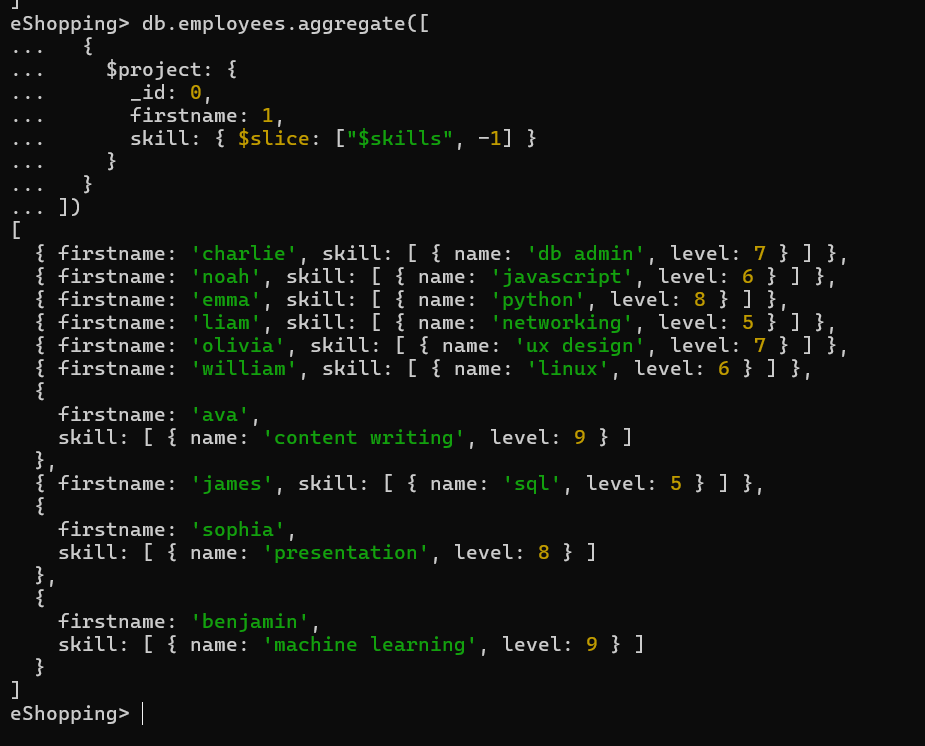

# **SIZE**

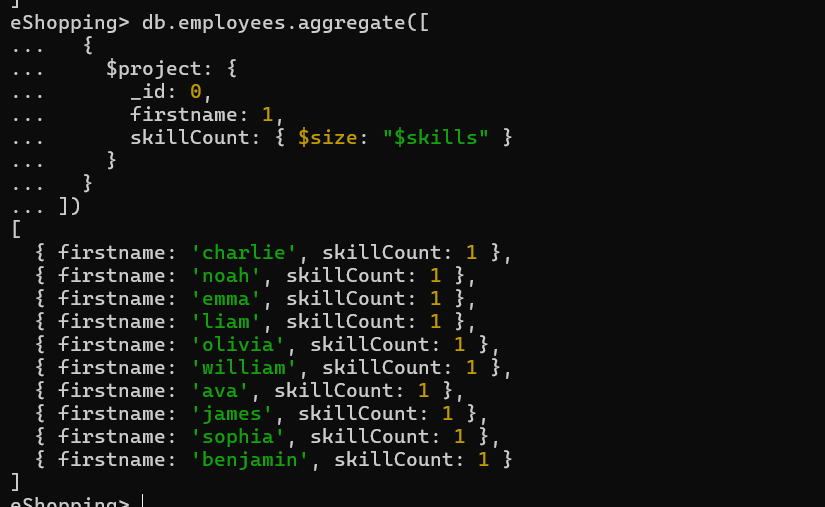

# **fliter():**



```
db.employees.aggregate([
  {
    $project: {
      _id: 0,
      firstname: 1,
      email: 1,
      skills: {
        $filter: {
          input: "$skills",
          as: "el",
          cond: { $gte: ["$$el.level", 8] }
        }
      }
    }
  }
])
```



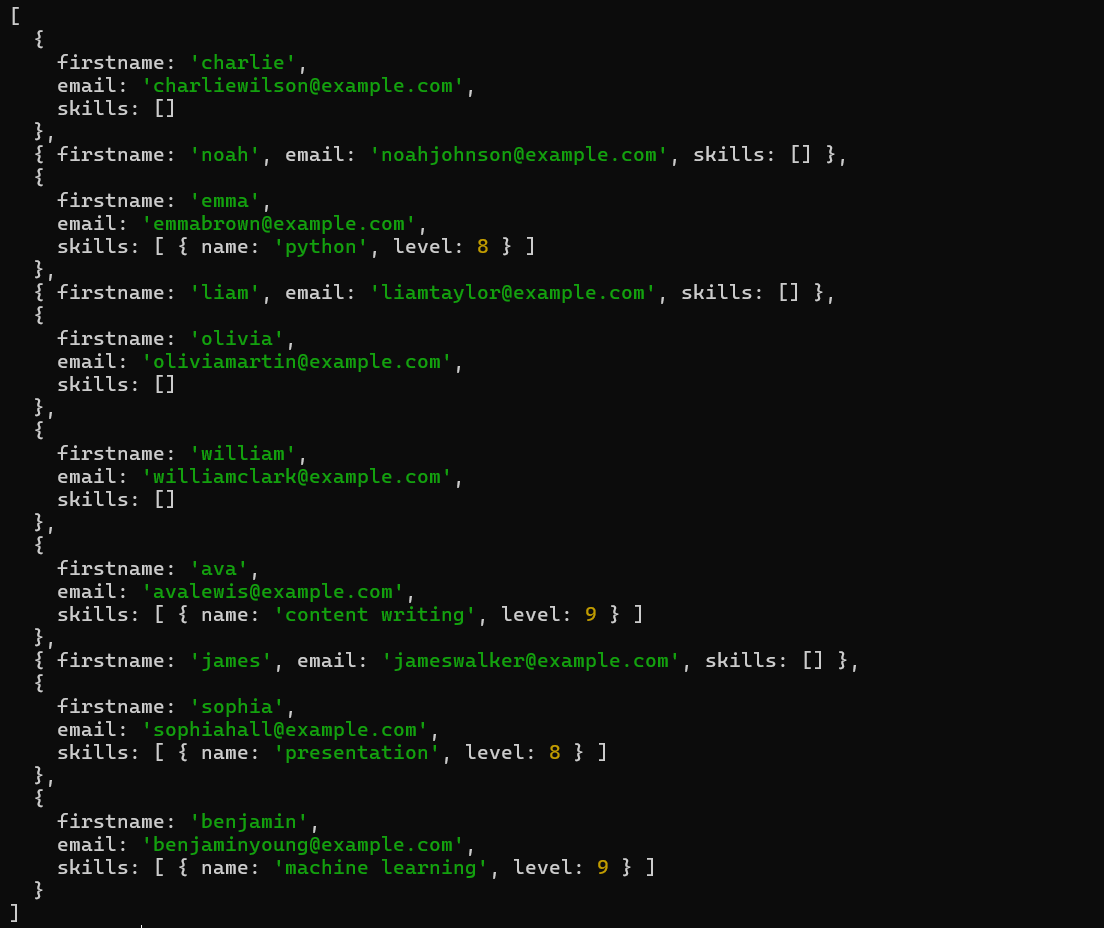

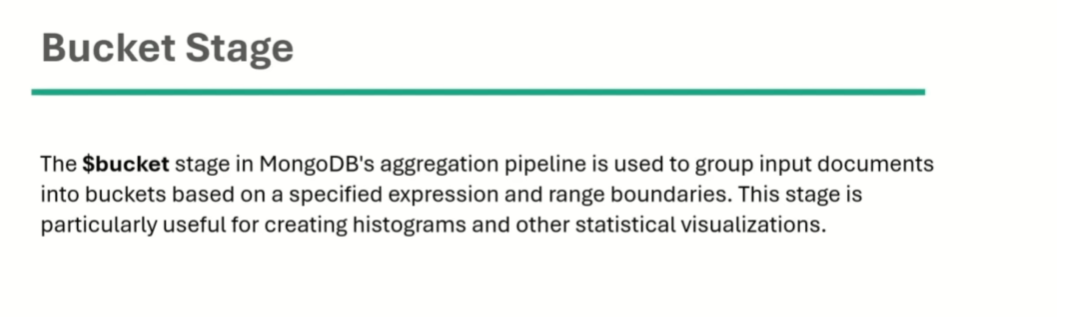



```
db.employees.aggregate([
  {
    $project: {
      _id: 0,
      firstname: 1,
      birthYear: { $isoWeekYear: { $toDate: "$dob" } }
    }
  },
  {
    $bucketAuto: {
      groupBy: "$birthYear",
      buckets: 5,
      output: {
        name: { $push: "$firstname" },
        total: { $sum: 1 },
        averageAge: { $avg: { $subtract: [2025, "$birthYear"] } }
      }
    }
  }
])
```



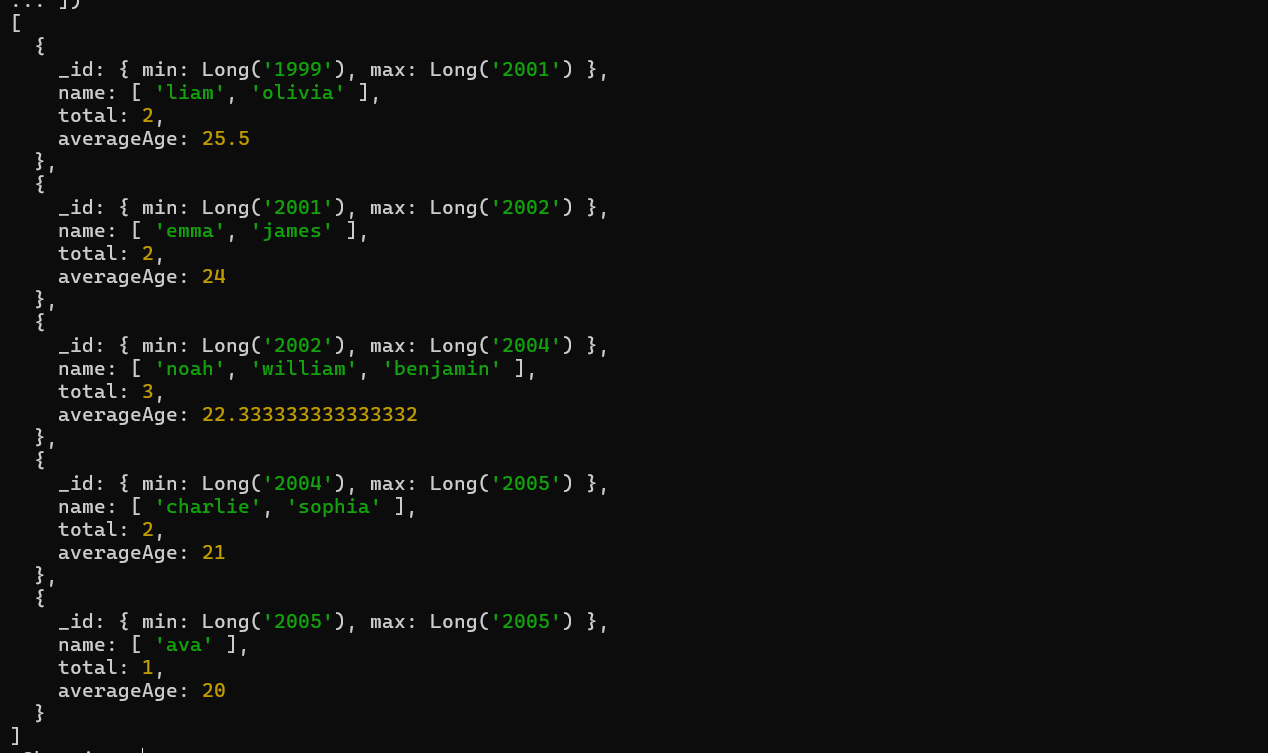



```
Explanation of the Output
Bucket 1: _id: { min: Long("1999"), max: Long("2001") }:
Birth Years: 1999 to 2001.
Employees: Liam (2001), Olivia (1999).
Total: 2 employees.
Average Age: 25.5.
Liam: 2025 - 2001 = 24.
Olivia: 2025 - 1999 = 26.
Average: (24 + 26) / 2 = 25.5.

Bucket 2: _id: { min: Long("2001"), max: Long("2002") }:
Birth Years: 2001 to 2002.
Employees: Emma, James.
Total: 2 employees.
Average Age: 24.
Emma (assuming 2001): 2025 - 2001 = 24.
James (assuming 2002): 2025 - 2002 = 23.
Average: (24 + 23) / 2 = 24.

Bucket 3: _id: { min: Long("2002"), max: Long("2004") }:
Birth Years: 2002 to 2004.
Employees: Noah, William, Benjamin.
Total: 3 employees.
Average Age: 22.333333333333332.
Noah (2002): 2025 - 2002 = 23.
William (2003): 2025 - 2003 = 22.
Benjamin (2004): 2025 - 2004 = 21.
Average: (23 + 22 + 21) / 3 = 22.3333....

Bucket 4: _id: { min: Long("2004"), max: Long("2005") }:
Birth Years: 2004 to 2005.
Employees: Charlie, Sophia.
Total: 2 employees.
Average Age: 21.
Charlie (2004): 2025 - 2004 = 21.
Sophia (2005): 2025 - 2005 = 20.
Average: (21 + 20) / 2 = 21.

Bucket 5: _id: { min: Long("2005"), max: Long("2005") }:
Birth Years: 2005.
Employees: Ava.
Total: 1 employee.
Average Age: 20.
Ava: 2025 - 2005 = 20.
```



# **Limit:**



```
db.employees.aggregate([
  {
    $project: {
      _id: 0,
      firstname: 1,
      birthDate: { $toDate: "$dob" }
    }
  },
  {
    $sort: { birthDate: 1 }
  },
  {
    $limit: 10
  }
])

```



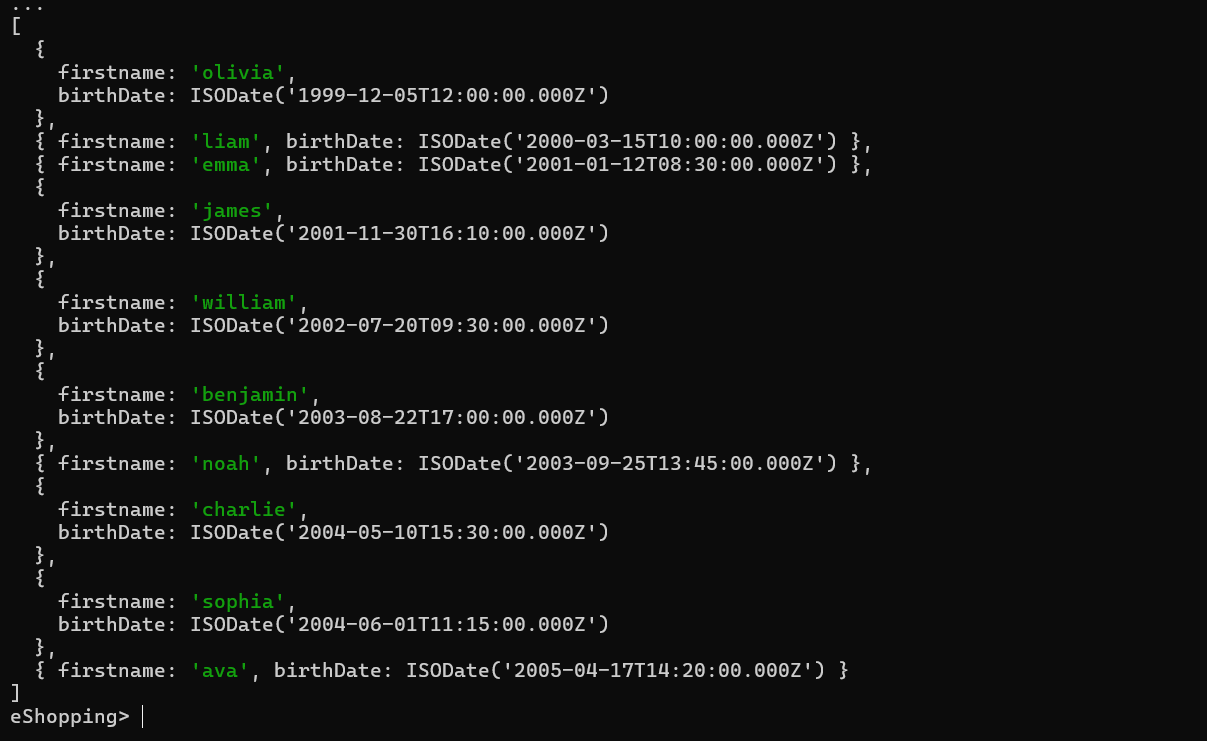

# **Skip:**



```
db.employees.aggregate([
  {
    $project: {
      _id: 0,
      firstname: 1,
      birthDate: { $toDate: "$dob" }
    }
  },
  {
    $sort: { birthDate: 1 }
  },
  {
    $skip: 5
  },
  {
    $limit: 10
  }
])

```



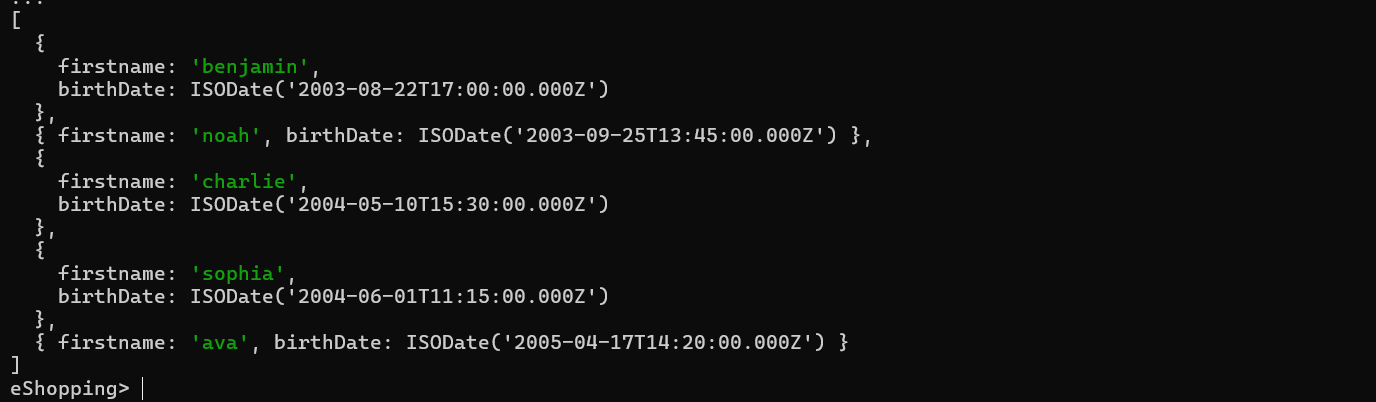